In [1]:
library(dplyr)
library(lubridate)
library(forecast)
library(ggplot2)
# importing the necessary libraries

# READING IN THE DATA FOR THE 2013-2023 YEARS
df_2013 <- read.csv("2013-2023_data/data/arrests_2013.csv")
df_2014 <- read.csv("2013-2023_data/data/arrests_2014.csv")
df_2015 <- read.csv("2013-2023_data/data/arrests_2015.csv")
df_2016 <- read.csv("2013-2023_data/data/arrests_2016.csv")
df_2017 <- read.csv("2013-2023_data/data/arrests_2017.csv")
df_2018 <- read.csv("2013-2023_data/data/arrests_2018.csv")
df_2019 <- read.csv("2013-2023_data/data/arrests_2019.csv")
df_2020 <- read.csv("2013-2023_data/data/arrests_2020.csv")
df_2021 <- read.csv("2013-2023_data/data/arrests_2021.csv")
df_2022 <- read.csv("2013-2023_data/data/arrests_2022.csv")
df_2023 <- read.csv("2013-2023_data/data/arrests_2023.csv")

# ROW BINDING THE FIRST YEARS TOGETHER
df <- rbind(df_2013, df_2014)
df <- rbind(df, df_2015)
df <- rbind(df, df_2016)
df <- rbind(df, df_2017)

# FIXING THE MISTMATCHES COLUMN NAMES (IN THE LATER YEARS)
df_2018 <- df_2018 %>%
  rename(
    Offense.GEOY = Offense.Block.GEOY,
    Offense.GEOX = Offense.Block.GEOX,
    Offense.PSA = Offense.Location.PSA,
    Offense.District = Offense.Location.District
  )
df_2019 <- df_2019 %>%
  rename(
    Offense.GEOY = Offense.Block.GEOY,
    Offense.GEOX = Offense.Block.GEOX,
    Offense.PSA = Offense.Location.PSA,
    Offense.District = Offense.Location.District
  )
df_2020 <- df_2020 %>%
  rename(
    Offense.GEOY = Offense.Block.GEOY,
    Offense.GEOX = Offense.Block.GEOX,
    Offense.PSA = Offense.Location.PSA,
    Offense.District = Offense.Location.District
  )
df <- df %>%
  rename(
    Arrest.Block.GEOX = Arrest.Location.Block.GeoX,
    Arrest.Block.GEOY = Arrest.Location.Block.GeoY
  )

df_2021 <- df_2021 %>%
  rename(
    Arrestee.Type = X...Arrestee.Type,
    Offense.GEOY = Offense.Block.GEOY,
    Offense.GEOX = Offense.Block.GEOX,
    Offense.PSA = Offense.Location.PSA,
    Offense.District = Offense.Location.District
  )
df_2022 <- df_2022 %>%
  rename(
    Arrestee.Type = X...Arrestee.Type,
    Offense.GEOY = Offense.Block.GEOY,
    Offense.GEOX = Offense.Block.GEOX,
    Offense.PSA = Offense.Location.PSA,
    Offense.District = Offense.Location.District
  )
df_2023 <- df_2023 %>%
  rename(
    Arrestee.Type = X...Arrestee.Type,
    Offense.GEOY = Offense.Block.GEOY,
    Offense.GEOX = Offense.Block.GEOX,
    Offense.PSA = Offense.Location.PSA,
    Offense.District = Offense.Location.District
  )

# ROW BINDING THE REST OF THE DATAFRAMES TOGETHER
df <- rbind(df, df_2018)
df <- rbind(df, df_2019)
df <- rbind(df, df_2020)
df <- rbind(df, df_2021)
df <- rbind(df, df_2022)
df <- rbind(df, df_2023)

# SAVING THE FULL DATAFRAME
write.csv(df, "arrests_2013-2023.csv", row.names = FALSE)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# CHECKING THE DATAFRAME AND NUMBER OF OBSERVATIONS
head(df)
nrow(df)
colnames(df)

,Arrestee.Type,Arrest.Year,Arrest.Date,Arrest.Hour,CCN,Arrest.Number.,Age,Defendant.PSA,Defendant.District,Defendant.Race,...,Arrest.Block.GEOX,Arrest.Block.GEOY,Offense.GEOY,Offense.GEOX,Offense.PSA,Offense.District,Arrest.Latitude,Arrest.Longitude,Offense.Latitude,Offense.Longitude
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adult Arrest,2013,2013-01-01,0,39e6b5312abaf50cabba5207ce614c8e40425ce8408f5528b3e52c445191d8ed,a765a0eb0ce5bbe83326cafff7b61ead522811b294712143c4797240aa9dfa3a,21,Out of State,Out of State,WHITE,...,396400,137600,137600,396400,208,2D,38.9063,-77.0415,38.9063,-77.0415
2,Adult Arrest,2013,2013-01-01,0,1a0164f06a25e9e086a70562a69532c92b049e5ca29121d1b72a65c91286cb9b,f6187f50558bbb8e040bd97ba8b9f4aef8e71b96c1d16423799a0ee395e39364,25,Out of State,Out of State,WHITE,...,397700,138800,138800,397700,305,3D,38.9171,-77.0265,38.9171,-77.0265
3,Adult Arrest,2013,2013-01-01,0,5fd418885c86c0009ee4bd99545f3aae75d51caee0a4c553cae2c66c24b3a0f1,5ad325d1514ca493b0579befb7876b97161bd48b6132220def9168aab291d30a,22,Out of State,Out of State,BLACK,...,396400,139200,139200,396400,303,3D,38.9207,-77.0415,38.9207,-77.0415
4,Adult Arrest,2013,2013-01-01,0,22affbd4c7e06c54ad6da5088711a00dbfcdb09a2bf511f1385f9603f7644b33,fc502bed48ebc8abb9df9381f0f7b2c9001a5ad0c507518a3261524a5ac15433,31,Out of State,Out of State,UNK,...,397800,139900,139900,397800,304,3D,38.9270,-77.0254,38.9270,-77.0254
5,Adult Arrest,2013,2013-01-01,0,e12b76427bba3c78d515942556c0bceca2d651af854fbb60aece2d750407cde9,0ef87a2218df18ab2b9d4389acfa078ad7380050e320c294a43f52004874cf07,31,Out of State,Out of State,UNK,...,397400,141500,141500,397400,404,4D,38.9414,-77.0300,38.9414,-77.0300
6,Adult Arrest,2013,2013-01-01,0,606fe874db57241984cb174163ee687c91abef9523231feadc974fecd0768d9a,af128cde7dc0a31f1b742e15c9895ad2ec230d4dcf232a9e0f04570c321d19c8,24,701,7D,BLACK,...,401600,136800,136800,401600,507,5D,38.8990,-76.9816,38.8990,-76.9816


[1] 275416

[1] "Arrestee.Type"            "Arrest.Year"             
 [3] "Arrest.Date"              "Arrest.Hour"             
 [5] "CCN"                      "Arrest.Number."          
 [7] "Age"                      "Defendant.PSA"           
 [9] "Defendant.District"       "Defendant.Race"          
[11] "Defendant.Ethnicity"      "Defendant.Sex"           
[13] "Arrest.Category"          "Charge.Description"      
[15] "Arrest.Location.PSA"      "Arrest.Location.District"
[17] "Arrest.Block.GEOX"        "Arrest.Block.GEOY"       
[19] "Offense.GEOY"             "Offense.GEOX"            
[21] "Offense.PSA"              "Offense.District"        
[23] "Arrest.Latitude"          "Arrest.Longitude"        
[25] "Offense.Latitude"         "Offense.Longitude"

In [3]:
# CREATING THE DATASETS TO USE FOR HYPOTEHSIS TESTING

# keeping only important variables
df <- df %>%
    select(Arrestee.Type, Arrest.Year, Arrest.Date, Arrest.Category, Arrest.Hour, Age, Defendant.Race, Defendant.Sex)

# fixing the issue with different dates
df$Arrest.Date <- parse_date_time(df$Arrest.Date, orders = c("ymd", "mdy"))


  Fall Spring Summer Winter 
 68045  70752  72309  64310 

	Chi-squared test for given probabilities

data:  crime_table
X-squared = 535.07, df = 3, p-value < 2.2e-16



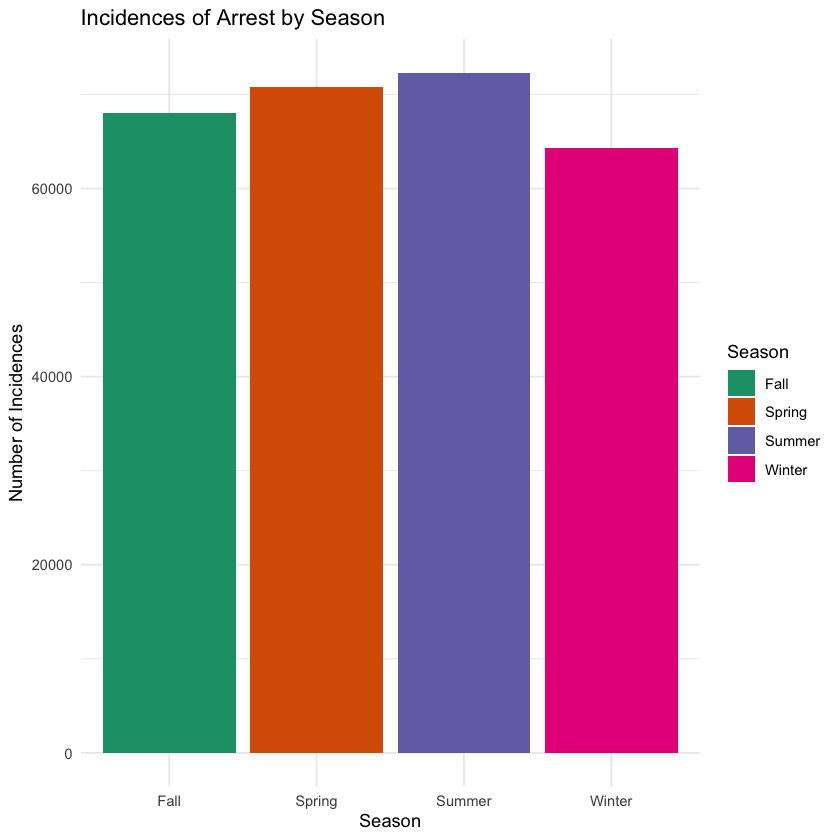


	Pairwise comparisons using Pairwise comparison of proportions 

data:  crime_counts out of rep(total_crimes, length(crime_counts)) 

  1       2       3      
2 2.7e-16 -       -      
3 < 2e-16 1.0e-05 -      
4 < 2e-16 < 2e-16 < 2e-16

P value adjustment method: bonferroni 


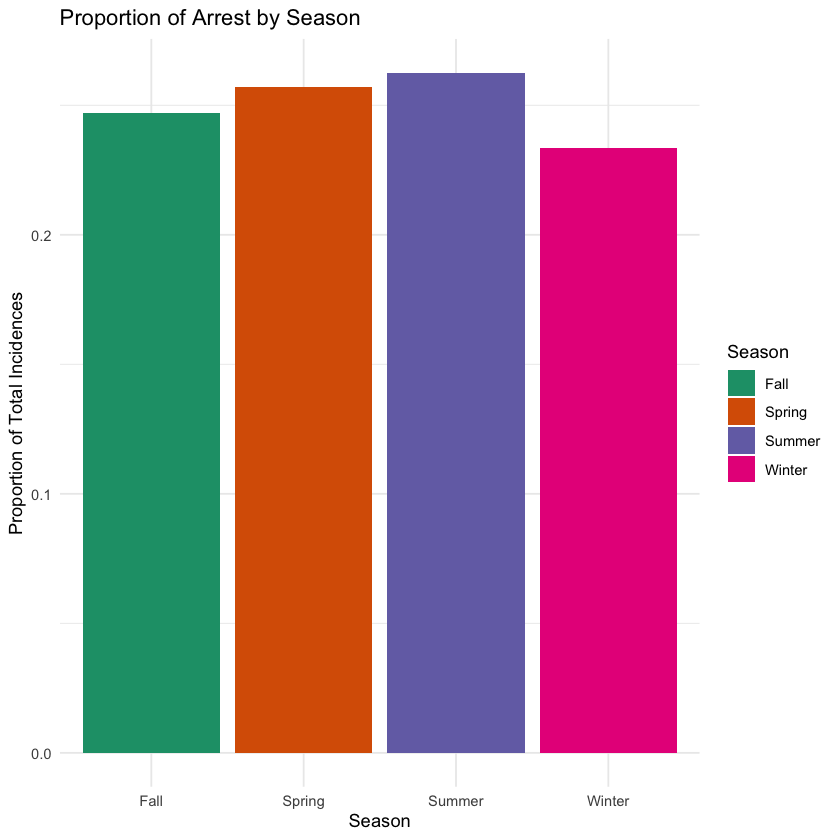

In [4]:
# TESTING WITH SEASONS
# Null: Crime counts are evenly distributed across the seasons
# Alternative: Crime counts are not evenly distributed across the seasons

# Conclusion: At least one season has significantly different crime counts

# creating the season variable based on the month of the crime
df$Arrest.Date <- as.Date(df$Arrest.Date, format = "%Y-%m-%d")
df$Season <- 
    ifelse(format(as.Date(df$Arrest.Date), "%m") %in% c("12", "01", "02"), "Winter",
    ifelse(format(as.Date(df$Arrest.Date), "%m") %in% c("03", "04", "05"), "Spring",
    ifelse(format(as.Date(df$Arrest.Date), "%m") %in% c("06", "07", "08"), "Summer", "Fall")))

# counting the instances of arrests during each season
crime_counts <- df %>%
    group_by(Season) %>%
    summarise(count = n())

# creating a table and performing chi-squared test
crime_table <- table(df$Season)
print(crime_table)
chisq_test <- chisq.test(crime_table)
print(chisq_test)

# plotting the arrests by season
ggplot(crime_counts, aes(x = Season, y = count, fill = Season)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(title = "Incidences of Arrest by Season", x = "Season", y = "Number of Incidences") +
    scale_fill_brewer(palette = "Dark2") 

# plotting the proportion of arrests by season
ggplot(crime_counts, aes(x = Season, y = count / sum(count), fill = Season)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(title = "Proportion of Arrest by Season", x = "Season", y = "Proportion of Total Incidences") +
    scale_fill_brewer(palette = "Dark2") 

# Doing pairwise tests to see which season is different
crime_counts <- as.numeric(crime_table)
total_crimes <- sum(crime_counts)
pairwise_test <- pairwise.prop.test(crime_counts, rep(total_crimes, length(crime_counts)), 
                                    p.adjust.method = "bonferroni")
print(pairwise_test)

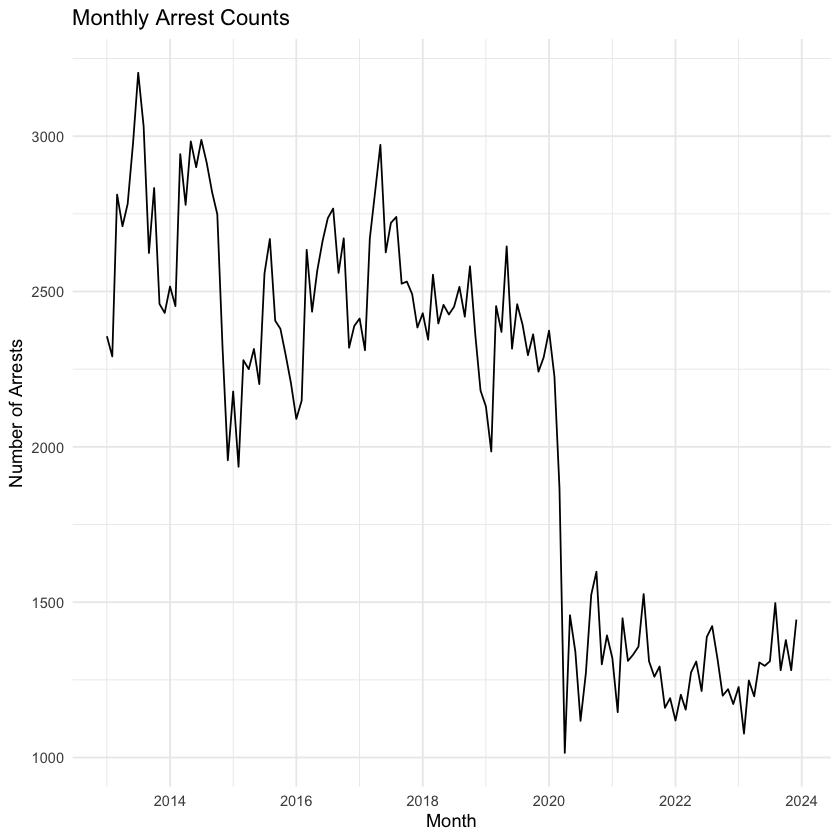

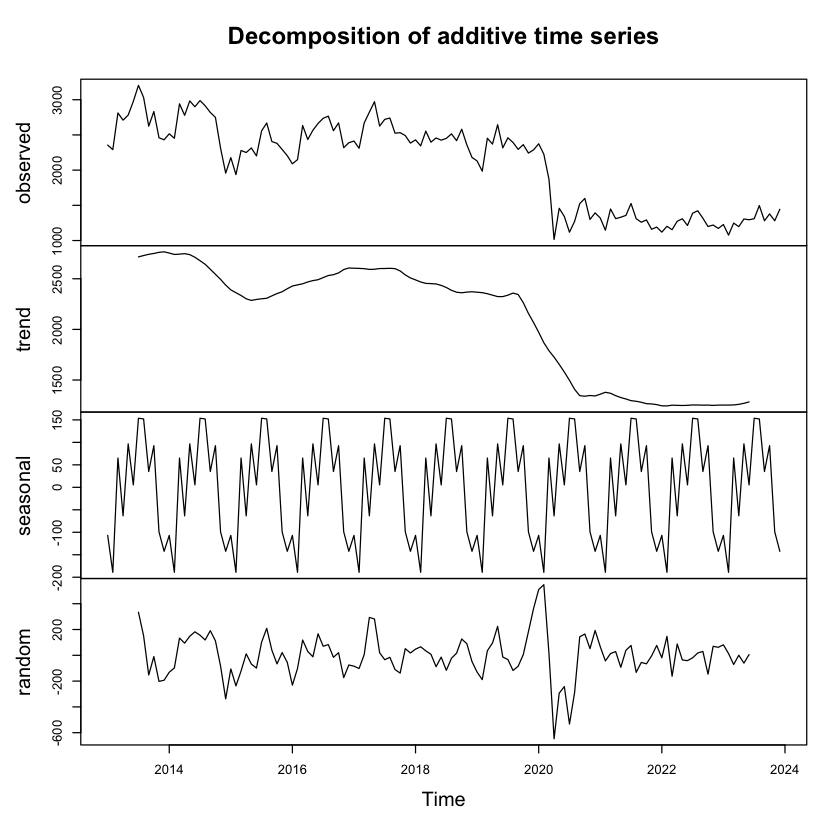

In [5]:
# LOOKING AT THE TIME SERIES DECMOPOSITION

# plotting the monthly arrests counts
df %>%
    mutate(Month = floor_date(as.Date(Arrest.Date), "month")) %>%
    group_by(Month) %>%
    summarise(count = n()) %>%
    ggplot(aes(x = Month, y = count)) +
    geom_line() +
    theme_minimal() +
    labs(title = "Monthly Arrest Counts", x = "Month", y = "Number of Arrests")

# grouping by months and getting the counts
monthly_crime <- df %>%
    mutate(Month = floor_date(as.Date(Arrest.Date), "month")) %>%
    group_by(Month) %>%
    summarise(count = n())

# Aggregating data to monthly level
monthly_crime_ts <- ts(monthly_crime$count, start = c(year(min(monthly_crime$Month)), 
                                                      month(min(monthly_crime$Month))), frequency = 12)

# Decomposing the time series
decomposed <- decompose(monthly_crime_ts)  # For additive decomposition
plot(decomposed)

# Aggregating data to monthly level
monthly_crime_ts <- ts(monthly_crime$count, start = c(year(min(monthly_crime$Month)), 
                                                      month(min(monthly_crime$Month))), frequency = 12)

# Decomposing the time series
decomposed <- decompose(monthly_crime_ts)  # For additive decomposition
plot(decomposed)


  January  February     March     April       May      June      July    August 
    22153     21122     24066     22561     24125     23317     24459     24533 
September   October  November  December 
    23031     23576     21438     21035 

	Chi-squared test for given probabilities

data:  crime_table
X-squared = 785.3, df = 11, p-value < 2.2e-16


	Pairwise comparisons using Pairwise comparison of proportions 

data:  crime_counts1 out of rep(total_crimes, length(crime_counts1)) 

   1       2       3       4       5       6       7       8       9      
2  1.6e-05 -       -       -       -       -       -       -       -      
3  < 2e-16 < 2e-16 -       -       -       -       -       -       -      
4  1.00000 4.9e-11 2.2e-11 -       -       -       -       -       -      
5  < 2e-16 < 2e-16 1.00000 2.6e-12 -       -       -       -       -      
6  8.2e-07 < 2e-16 0.02146 0.01530 0.00702 -       -       -       -      
7  < 2e-16 < 2e-16 1.00000 < 2e-16 1.00000 3.1e-06 -      

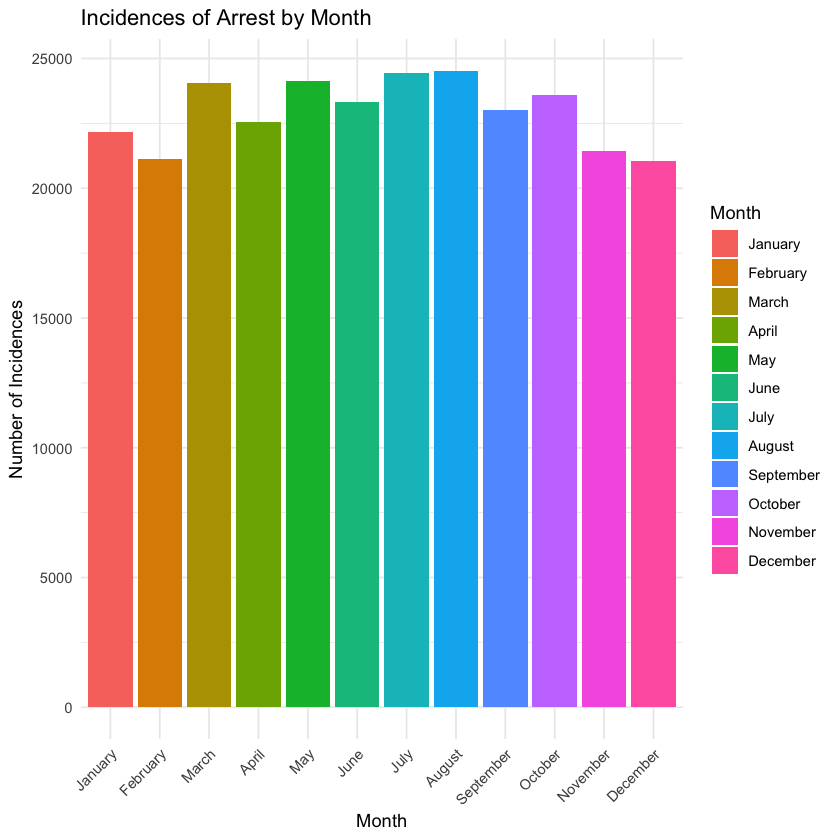

In [6]:
# MONTHS OF THE YEAR
df$Month <- format(as.Date(df$Arrest.Date), "%B")
df$Month <- factor(df$Month, levels = c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

# counts of the arrests by month
crime_counts1 <- df %>%
    group_by(Month) %>%
    summarise(count = n())

# tabling and chi-sqaured test
crime_table <- table(df$Month)
print(crime_table)
chisq_test <- chisq.test(crime_table)
print(chisq_test)

# plotting the arrests by month
ggplot(crime_counts1, aes(x = Month, y = count, fill = Month)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(title = "Incidences of Arrest by Month", x = "Month", y = "Number of Incidences") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Doing pairwise tests to see which month is different
crime_counts1 <- as.numeric(crime_table)
total_crimes <- sum(crime_counts1)
pairwise_test <- pairwise.prop.test(crime_counts1, rep(total_crimes, length(crime_counts1)), 
                                    p.adjust.method = "bonferroni")
print(pairwise_test)
print(crime_table)


Weekday Weekend 
 156585  118831 

	Chi-squared test for given probabilities

data:  crime_table_weekend
X-squared = 5175.3, df = 1, p-value < 2.2e-16


Weekday Weekend 
0.56854 0.43146 

	1-sample proportions test with continuity correction

data:  crime_table_weekend, null probability 0.5
X-squared = 5175, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5666875 0.5703905
sample estimates:
      p 
0.56854 


   Sunday    Monday   Tuesday Wednesday  Thursday    Friday  Saturday 
    34604     33598     39374     41814     41799     42458     41769 

	Chi-squared test for given probabilities

data:  crime_table_days
X-squared = 2114.4, df = 6, p-value < 2.2e-16



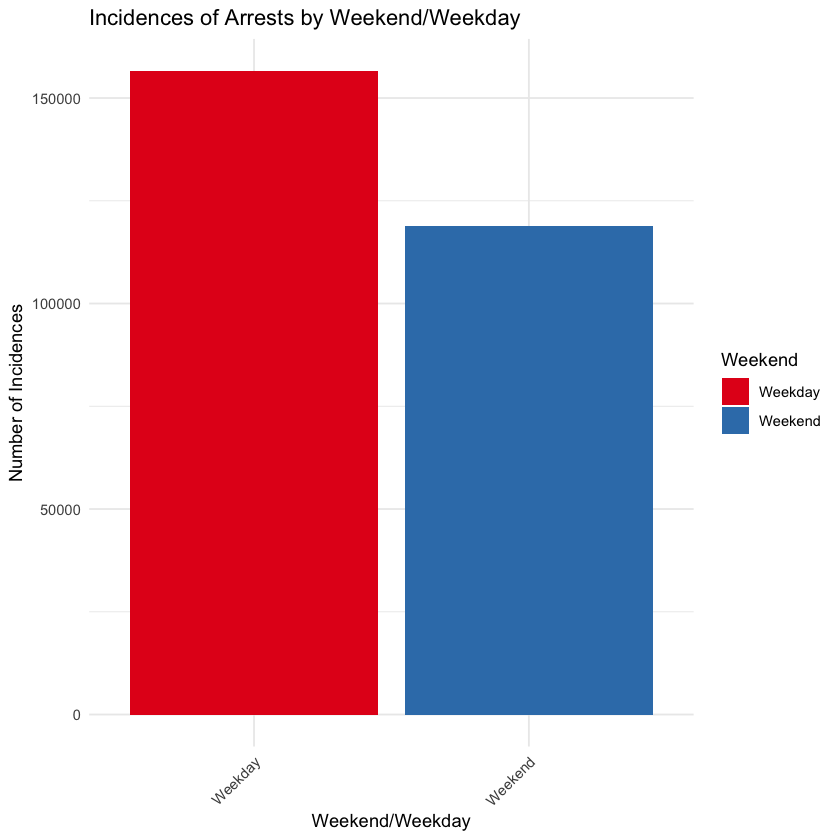


	Pairwise comparisons using Pairwise comparison of proportions 

data:  crime_counts out of rep(total_crimes, length(crime_counts)) 

  1       2       3       4       5       6      
2 0.00083 -       -       -       -       -      
3 < 2e-16 < 2e-16 -       -       -       -      
4 < 2e-16 < 2e-16 < 2e-16 -       -       -      
5 < 2e-16 < 2e-16 < 2e-16 1.00000 -       -      
6 < 2e-16 < 2e-16 < 2e-16 0.33803 0.28930 -      
7 < 2e-16 < 2e-16 < 2e-16 1.00000 1.00000 0.21007

P value adjustment method: bonferroni 

   Sunday    Monday   Tuesday Wednesday  Thursday    Friday  Saturday 
    34604     33598     39374     41814     41799     42458     41769 


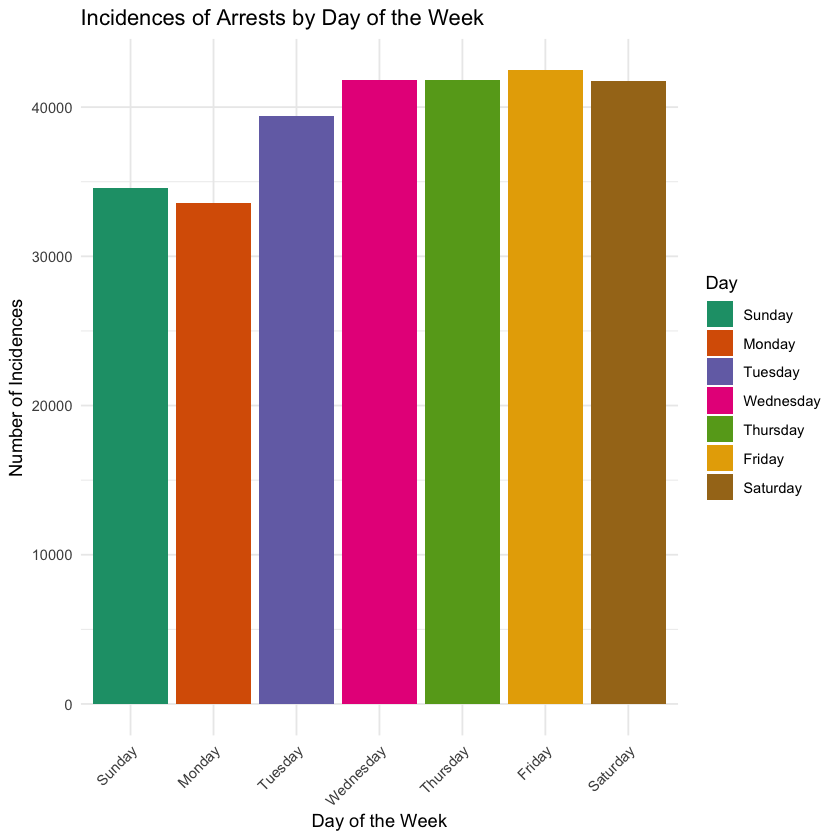

In [7]:
# WEEKENDS VERSUS WEEKDAY CRIMES
df$Month <- format(as.Date(df$Arrest.Date), "%B")
df$Day <- weekdays(as.Date(df$Arrest.Date))
df$Day <- factor(df$Day, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
df$Weekend <- ifelse(df$Day %in% c("Friday", "Saturday", "Sunday"), "Weekend", "Weekday")

# # counting the instances of arrests during weekends and weekdays
crime_counts_weekend <- df %>%
    group_by(Weekend) %>%
    summarise(count = n())

# creating a table and performing chi-squared test for weekend
crime_table_weekend <- table(df$Weekend)
print(crime_table_weekend)
chisq_test_weekend <- chisq.test(crime_table_weekend)
print(chisq_test_weekend)

crime_proportions <- prop.table(crime_table_weekend)
print(crime_proportions)
prop_test_weekend <- prop.test(crime_table_weekend)
print(prop_test_weekend)

# tabling and chi-sqaured test for days
crime_table_days <- table(df$Day)
print(crime_table_days)
chisq_test_days <- chisq.test(crime_table_days)
print(chisq_test_days)

# plotting the arrests weekend vs weekday
ggplot(crime_counts_weekend, aes(x = Weekend, y = count, fill = Weekend)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(title = "Incidences of Arrests by Weekend/Weekday", x = "Weekend/Weekday", y = "Number of Incidences") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_fill_brewer(palette = "Set1") 

# counting the instances of arrests by day of the week
crime_counts_day <- df %>%
    group_by(Day) %>%
    summarise(count = n())

# plotting the arrests by day
ggplot(crime_counts_day, aes(x = Day, y = count, fill = Day)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(title = "Incidences of Arrests by Day of the Week", x = "Day of the Week", y = "Number of Incidences") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_fill_brewer(palette = "Dark2") 

# Doing pairwise tests to see which day is different
crime_counts <- as.numeric(crime_table_days)
total_crimes <- sum(crime_counts)
pairwise_test <- pairwise.prop.test(crime_counts, rep(total_crimes, length(crime_counts)), 
                                    p.adjust.method = "bonferroni")
print(pairwise_test)
print(crime_table_days)

In [8]:
# PERFORMING A T-TEST FOR WEEKEND VS WEEKDAYS
daily_crime_counts <- df %>%
    group_by(Day) %>%
    summarise(crimes_per_day = n())

# splitting between weekdays and weekend
daily_crime_counts <- daily_crime_counts %>%
    mutate(Weekend = ifelse(Day %in% c("Friday", "Saturday", "Sunday"), "Weekend", "Weekday"))

# Step 3: Perform a t-test
t_test <- t.test(crimes_per_day ~ Weekend, data = daily_crime_counts)
print(t_test)


	Welch Two Sample t-test

data:  crimes_per_day by Weekend
t = -0.14636, df = 4.1154, p-value = 0.8905
alternative hypothesis: true difference in means between group Weekday and group Weekend is not equal to 0
95 percent confidence interval:
 -9171.319  8243.153
sample estimates:
mean in group Weekday mean in group Weekend 
             39146.25              39610.33 



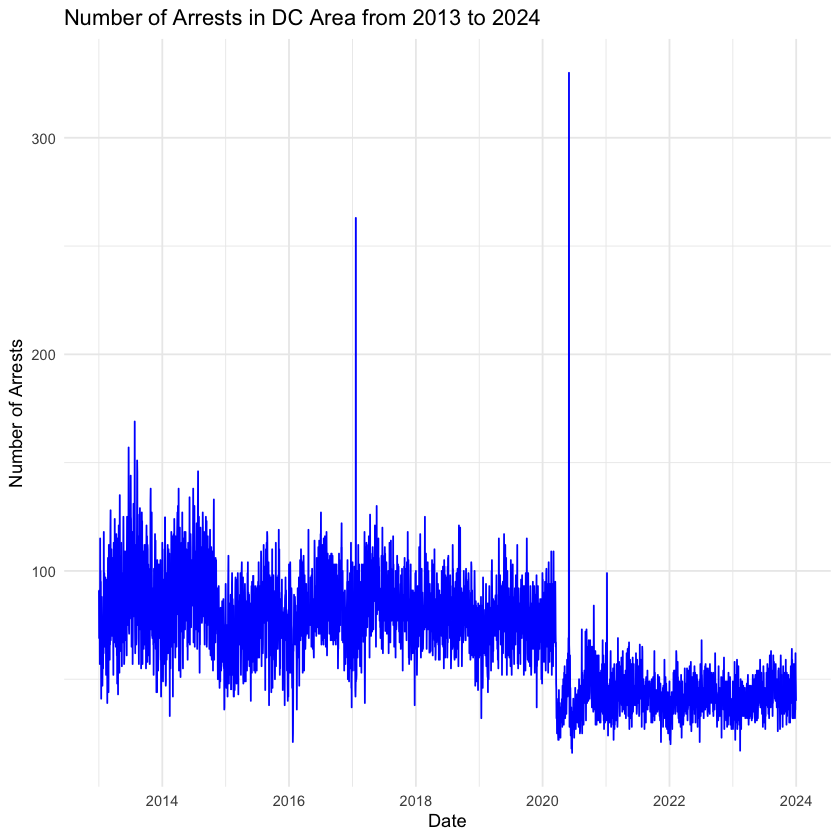

In [9]:
# TIME SERIES GRAPH

# aggregating by Arrest.Date
time_series_data <- df %>%
    group_by(Arrest.Date) %>%
    summarise(count = n())

# plotting the time series graph of number of arrests
ggplot(time_series_data, aes(x = Arrest.Date, y = count)) +
    geom_line(color = "blue") +
    theme_minimal() +
    labs(title = "Number of Arrests in DC Area from 2013 to 2024", x = "Date", y = "Number of Arrests")

In [10]:
# getting the unique crime categories for better labelling purposes
print(unique(df$Arrest.Category))

 [1] "Assault on a Police Officer"        "Disorderly Conduct"                
 [3] "Driving/Boating While Intoxicated"  "Traffic Violations"                
 [5] "Simple Assault"                     "Burglary"                          
 [7] "Weapon Violations"                  "Liquor Law Violations"             
 [9] "Narcotics"                          "Damage to Property"                
[11] "Release Violations/Fugitive"        "Assault with a Dangerous Weapon"   
[13] "Theft"                              "Other Crimes"                      
[15] "Aggravated Assault"                 "Property Crimes"                   
[17] "Sex Abuse"                          "Robbery"                           
[19] "Kidnapping"                         "Fraud and Financial Crimes"        
[21] "Theft from Auto"                    "Vending Violations"                
[23] "Prostitution"                       "Sex Offenses"                      
[25] "Offenses Against Family & Children" "Motor Veh

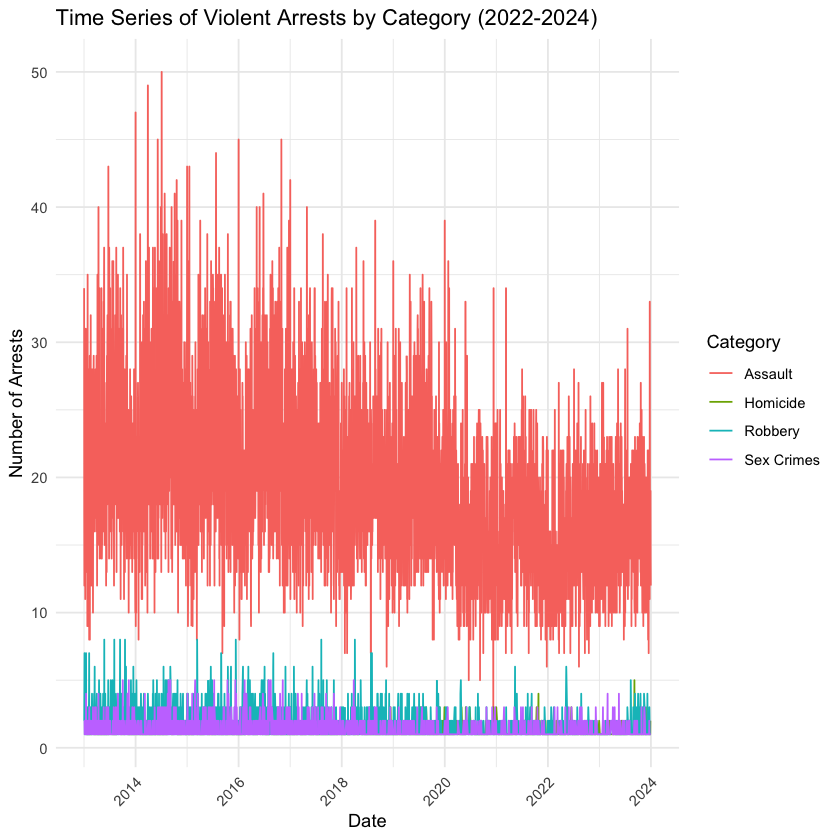

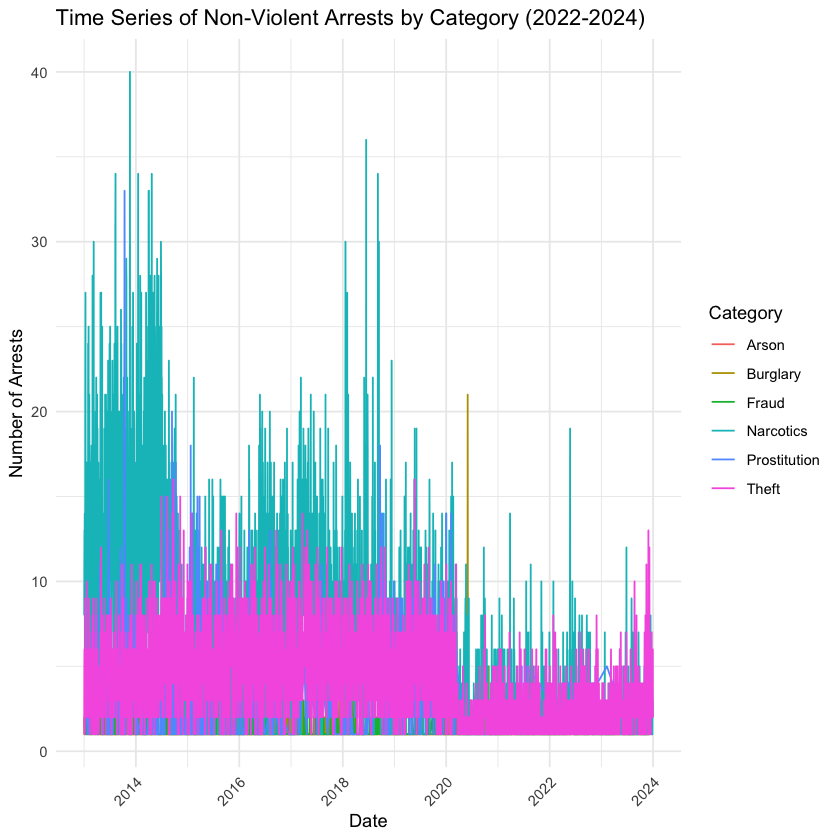

In [11]:
# TIME SERIES GRAPH

# grouping the arrests in less categories based on the type of crime
df$Arrest.Category.Splits <- ifelse(df$Arrest.Category %in% c("Assault on a Police Officer", "Simple Assault", "Aggravated Assault", "Assault with a Dangerous Weapon"), "Assault", 
									ifelse(df$Arrest.Category == "Arson", "Arson",
									ifelse(df$Arrest.Category %in% c("Fraud and Financial Crimes", "Fraud and Financial Crimes (Frau)", "Fraud and Financial Crimes (Forg)", "Fraud and Financial Crimes (Coun)"), "Fraud",
									ifelse(df$Arrest.Category == "Homicide", "Homicide",
									ifelse(df$Arrest.Category == "Burglary", "Burglary",
									ifelse(df$Arrest.Category == "Narcotics", "Narcotics",
									ifelse(df$Arrest.Category %in% c("Sex Offenses", "Sex Abuse"), "Sex Crimes",
									ifelse(df$Arrest.Category == "Robbery", "Robbery",
									ifelse(df$Arrest.Category == "Theft", "Theft",
									ifelse(df$Arrest.Category == "Prostitution", "Prostitution", "Other"))))))))))


# splitting the data into violent crimes and non-violent crimes (for better plotting)
violent_crimes <- c("Assault", "Homicide", "Robbery", "Sex Crimes")
non_violent_crimes <- c("Arson", "Fraud", "Burglary", "Narcotics", "Theft", "Prostitution")

# aggregating data for violent crimes
time_series_data_violent <- df %>%
    filter(Arrest.Category.Splits %in% violent_crimes) %>%
    group_by(Arrest.Date, Arrest.Category.Splits) %>%
    summarise(count = n(), .groups = "drop")

# aggregating data for non-violent crimes
time_series_data_non_violent <- df %>%
    filter(Arrest.Category.Splits %in% non_violent_crimes) %>%
    group_by(Arrest.Date, Arrest.Category.Splits) %>%
    summarise(count = n(), .groups = "drop")

# plotting the violent crimes over time
ggplot(time_series_data_violent, aes(x = Arrest.Date, y = count, color = Arrest.Category.Splits)) +
    geom_line() +
    theme_minimal() +
    labs(title = "Time Series of Violent Arrests by Category (2022-2024)", x = "Date", y = "Number of Arrests", color = "Category") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# plotting the non-violent crimes over time
ggplot(time_series_data_non_violent, aes(x = Arrest.Date, y = count, color = Arrest.Category.Splits)) +
    geom_line() +
    theme_minimal() +
    labs(title = "Time Series of Non-Violent Arrests by Category (2022-2024)", x = "Date", y = "Number of Arrests", color = "Category") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

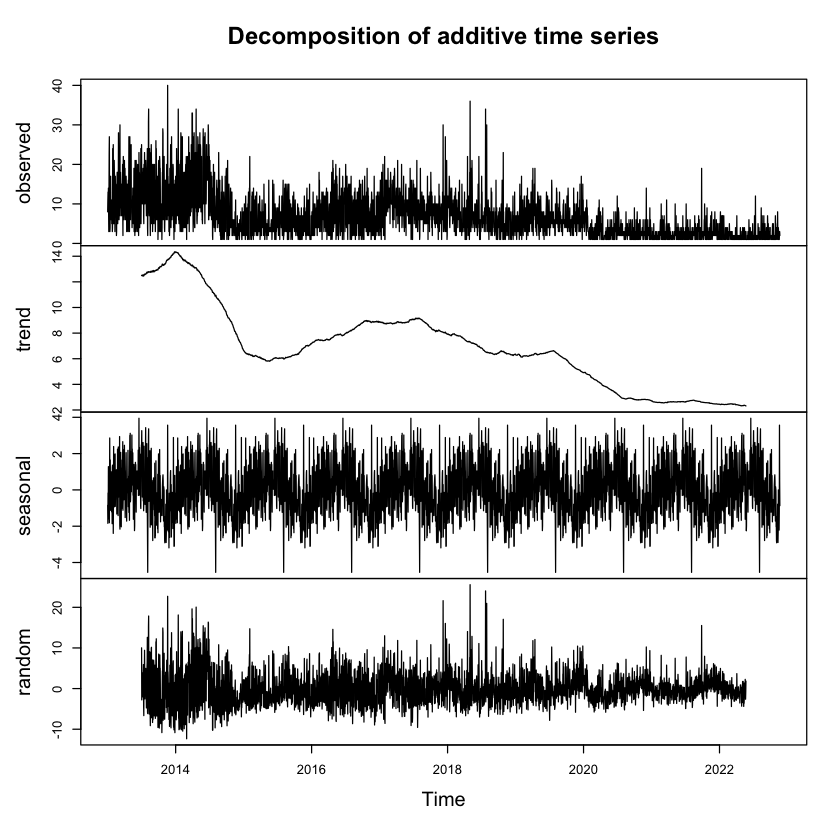

In [12]:
# TIME SERIES DECOMPOSITION
# filter and aggregate data for narcotics

narcotics_data <- df %>%
    filter(Arrest.Category.Splits == "Narcotics") %>%
    group_by(Arrest.Date) %>%
    summarise(count = n())

# convert to time series object
narcotics_ts <- ts(narcotics_data$count, start = c(2013, 1), frequency = 365)

# time series decomposition and plot
narcotics_decomp <- decompose(narcotics_ts)
plot(narcotics_decomp)

In [13]:
# SUMMARY STATISTICS

# Number of crimes per year
crimes_per_year <- df %>%
    group_by(Arrest.Year) %>%
    summarise(count = n())

print(crimes_per_year)

# min, max, average of age
age_summary <- df %>%
    summarise(
        min_age = min(Age, na.rm = TRUE),
        max_age = max(Age, na.rm = TRUE),
        avg_age = mean(Age, na.rm = TRUE)
    )

print(age_summary)

# counts of arrest category
arrest_category_counts <- df %>%
    group_by(Arrest.Category) %>%
    summarise(count = n()) %>%
    arrange(count)

print(head(arrest_category_counts))
print("hi")
print(tail(arrest_category_counts))


# A tibble: 11 x 2
   Arrest.Year count
         <int> <int>
 1        2013 32513
 2        2014 32313
 3        2015 27672
 4        2016 29980
 5        2017 31209
 6        2018 29115
 7        2019 27938
 8        2020 18491
 9        2021 15653
10        2022 14991
11        2023 15541
  min_age max_age  avg_age
1      18     122 35.07113
# A tibble: 6 x 2
  Arrest.Category                   count
  <chr>                             <int>
1 Fraud and Financial Crimes (Coun)     1
2 Fraud and Financial Crimes (Forg)     4
3 NA                                   12
4 Arson                                47
5 Fraud and Financial Crimes (Frau)    62
6 Kidnapping                          217
[1] "hi"
# A tibble: 6 x 2
  Arrest.Category             count
  <chr>                       <int>
1 Other Crimes                14761
2 Theft                       15940
3 Narcotics                   24957
4 Release Violations/Fugitive 31814
5 Traffic Violations          32447
6 Simple Assault     

In [14]:
# counts by ethnicity
ethnicity_counts <- df %>%
    group_by(Defendant.Race) %>%
    summarise(count = n())

print(ethnicity_counts)

# counts by sex
sex_counts <- df %>%
    group_by(Defendant.Sex) %>%
    summarise(count = n())

print(sex_counts)

# A tibble: 7 x 2
  Defendant.Race  count
  <chr>           <int>
1 ASIAN            1610
2 BLACK          237253
3 MULTIPLE           83
4 OTHER             559
5 UNK              7667
6 UNKNOWN          3222
7 WHITE           25022
# A tibble: 4 x 2
  Defendant.Sex  count
  <chr>          <int>
1 FEMALE         62224
2 MALE          212912
3 UNK              181
4 UNKNOWN           99
